In [47]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import pca
from socket import socket

%matplotlib inline

In [2]:
os.chdir(r"C:\Users\micha\OneDrive\Desktop\RelianceHMO")
os.getcwd()

'C:\\Users\\micha\\OneDrive\\Desktop\\RelianceHMO'

In [3]:
reliancehmodata = pd.read_csv("Data.csv")
df = pd.DataFrame(reliancehmodata)
df.head()

,SEX,PLAN,COMPANY,PROVIDER_NAME,PATIENT_ENCOUNTER_DATE,MEDICAL_CLAIMS_SUBMISSION_DATE,PAYMENT _DATE,SERVICE_TYPE,DIAGNOSIS,TOTAL_PRICE,AGE,SUBMISSION_GAP(DAYS),SUBMISSION_GAP(MONTHS)
0,F,RED Family,CORPORATE,JAY'S HOSPITAL,18/02/1997,14/03/1998,19/03/1998,Outpatient,IMMUNIZATION AUTHORIZATION DODE: PA/D14CCF,900,36,389,13
1,F,RED Family,PARTNERSHIP,FINICKY MEDICAL,18/06/1998,17/01/1999,18/01/1999,Outpatient,Plasmodiasis/PID,3147,1,213,7
2,M,RED Family,PARTNERSHIP,FINICKY MEDICAL,18/06/1998,17/01/1999,18/01/1999,Outpatient,Perineal candidiasis with secondary Bacteria i...,2991,31,213,7
3,M,GREEN Family,CORPORATE,VOILA HOSPITAL,06/12/1997,29/06/1998,29/06/1998,Outpatient,"SKIN RASH, TINEA CORPORIS",6350,36,205,7
4,F,Yellow Family,CORPORATE,OLANREWAJU HOSPITAL,28/06/1998,07/01/1999,09/01/1999,Outpatient,URTI/FOLLICULITIS,1231,2,193,6


In [5]:
df_categorical = ["PLAN", "SEX", "COMPANY","PROVIDER_NAME", "SERVICE_TYPE","DIAGNOSIS"]
df_continuos = ["AGE","SUBMISSION_GAP(DAYS)"]

In [6]:
for col in df_categorical:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

In [7]:
df.drop(columns = ["PATIENT_ENCOUNTER_DATE",	"MEDICAL_CLAIMS_SUBMISSION_DATE",	"PAYMENT _DATE"], inplace = True)

In [8]:
df.head()

,TOTAL_PRICE,AGE,SUBMISSION_GAP(DAYS),SUBMISSION_GAP(MONTHS),PLAN_BLUE Family,PLAN_BLUE Family(2),PLAN_BLUE Individual,PLAN_COMPASS RED Individual,PLAN_GREEN FAMILY,PLAN_GREEN FAMILY LITE,...,DIAGNOSIS_uti/plasmodiasi,DIAGNOSIS_uts,DIAGNOSIS_vagina candidiasis/hypopigmental patches ?cause,DIAGNOSIS_vaginitis,DIAGNOSIS_vavicocele,"DIAGNOSIS_vertigo ? cause, low back pain ? cause, malaria fever r/o typhoid fever",DIAGNOSIS_viral fever r/o malaria,"DIAGNOSIS_vomiting in a neonate ?cause kiv pyloric stenosis,malaria",DIAGNOSIS_whitlow(pilp space infection),DIAGNOSIS_xray
0,900,36,389,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3147,1,213,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2991,31,213,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6350,36,205,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1231,2,193,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[7.61344781e-02 1.08622503e-01 3.03330787e-02 ... 6.04230094e-05
 1.41181162e-04 4.69956740e-05]


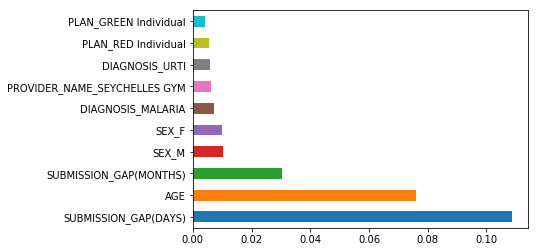

In [9]:
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0]   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
dataforclustering = df.loc[:, ['SUBMISSION_GAP(DAYS)',
 'AGE',
 'SUBMISSION_GAP(MONTHS)',
 'SEX_M',
 'SEX_F',
 'DIAGNOSIS_MALARIA',
 'DIAGNOSIS_URTI',
 'DIAGNOSIS_gym',
 'COMPANY_CORPORATE',
 'PROVIDER_NAME_SEYCHELLES GYM']] = df[['SUBMISSION_GAP(DAYS)',
 'AGE',
 'SUBMISSION_GAP(MONTHS)',
 'SEX_M',
 'SEX_F',
 'DIAGNOSIS_MALARIA',
 'DIAGNOSIS_URTI',
 'DIAGNOSIS_gym',
 'COMPANY_CORPORATE',
 'PROVIDER_NAME_SEYCHELLES GYM']]

In [11]:
dataforclustering.head()

,SUBMISSION_GAP(DAYS),AGE,SUBMISSION_GAP(MONTHS),SEX_M,SEX_F,DIAGNOSIS_MALARIA,DIAGNOSIS_URTI,DIAGNOSIS_gym,COMPANY_CORPORATE,PROVIDER_NAME_SEYCHELLES GYM
0,389,36,13,0,1,0,0,0,1,0
1,213,1,7,0,1,0,0,0,0,0
2,213,31,7,1,0,0,0,0,0,0
3,205,36,7,1,0,0,0,0,1,0
4,193,2,6,0,1,0,0,0,1,0


In [12]:
mms = MinMaxScaler()
mms.fit(dataforclustering)
data_transformed = mms.transform(dataforclustering)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

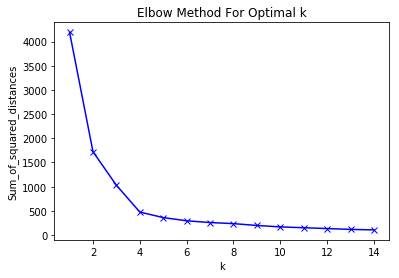

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Optimal K = 4